In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import keras
import random
import sys
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
# Run in case warnings should be ignored
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',300)


In [2]:
import os
# path where i want to search
path = r'C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/'
# the extension i want to detect
extension = '.csv'
list_file_name_path = []

for root, dirs_list, files_list in os.walk(path):
    for file_name in files_list:
        if os.path.splitext(file_name)[-1] == extension:
            file_name_path = os.path.join(root, file_name)
            list_file_name_path.append(file_name_path)
            print(file_name) 
            print(file_name_path)
for i in range(len(list_file_name_path)):
    print(f'Path: {list_file_name_path[i]} mit Index: {i}')

elonmusk_tweets.csv
C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/elonmusk_tweets.csv
realdonaldtrump.csv
C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/realdonaldtrump.csv
titanic.csv
C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/titanic.csv
Path: C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/elonmusk_tweets.csv mit Index: 0
Path: C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/realdonaldtrump.csv mit Index: 1
Path: C:/Users/dietm/Documents/Data Science_Didi/10. Woche/Machine Learning/Naive_Bayes/titanic.csv mit Index: 2


In [3]:
df_musk = pd.read_csv(list_file_name_path[0])
df_trump = pd.read_csv(list_file_name_path[1])

In [4]:
df_musk = df_musk[['id','text']]
df_musk

,id,text
0,849636868052275200,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1,848988730585096192,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"""
2,848943072423497728,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,b'Stormy weather in Shortville ...'
4,848416049573658624,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""
...,...,...
2814,142881284019060736,b'That was a total non sequitur btw'
2815,142880871391838208,"b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'"
2816,142188458125963264,b'I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a miniature Stonehenge...'
2817,142179928203460608,"b""Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"""


In [5]:
df_trump = df_trump[['id','content']][:len(df_musk)]
df_trump

,id,content
0,1698308935,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,1701461182,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,1737479987,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!
3,1741160716,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
4,1773561338,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump"
...,...,...
2814,235106470012805122,Why would anyone let pervert @ RepWeiner use their house? He was always a bad guy- now he’s trying to make nice to everyone.
2815,235115252310749184,Glad to hear patriotic Americans are organizing a movement this August to boycott Chinese products http://www.cyrilhuzeblog.com/2011/08/02/dont-buy-any-chinese-products-from-august-1st-to-september-1st-2011-and-beyond%E2%80%A6/ … People get it!
2816,235121646221004800,In four weeks the ‘All Star’ cast of @ ApprenticeNBC begins filming what will be another great season! Everyone is in for a treat.
2817,235121838181715969,“Borrowing and spending is not the way to prosperity.” -- @ PaulRyanVP


In [6]:
df_musk.loc[df_musk['id'] > 10,'id'] = 0
df_trump.loc[df_trump['id'] > 10, 'id'] = 1

In [7]:
df_musk.head()

,id,text
0,0,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1,0,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"""
2,0,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,0,b'Stormy weather in Shortville ...'
4,0,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""


In [8]:
df_trump['text'] = df_trump['content']

In [9]:
df_trump = df_trump[['id','text']]

In [10]:
df_trump.head()

,id,text
0,1,Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!
1,1,Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!
2,1,Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!
3,1,New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e
4,1,"""My persona will never be that of a wallflower - I’d rather build walls than cling to them"" --Donald J. Trump"


In [11]:
df01 = pd.concat(objs=(df_musk,df_trump))

In [12]:
df01

,id,text
0,0,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1,0,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"""
2,0,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,0,b'Stormy weather in Shortville ...'
4,0,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""
...,...,...
2814,1,Why would anyone let pervert @ RepWeiner use their house? He was always a bad guy- now he’s trying to make nice to everyone.
2815,1,Glad to hear patriotic Americans are organizing a movement this August to boycott Chinese products http://www.cyrilhuzeblog.com/2011/08/02/dont-buy-any-chinese-products-from-august-1st-to-september-1st-2011-and-beyond%E2%80%A6/ … People get it!
2816,1,In four weeks the ‘All Star’ cast of @ ApprenticeNBC begins filming what will be another great season! Everyone is in for a treat.
2817,1,“Borrowing and spending is not the way to prosperity.” -- @ PaulRyanVP


In [13]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 0 to 2818
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5638 non-null   int64 
 1   text    5638 non-null   object
dtypes: int64(1), object(1)
memory usage: 132.1+ KB


In [14]:
# shuffle the data before working with it
df01 = df01.sample(frac=1.0,random_state=33)
df01

,id,text
215,0,"b'@iamDeveloper Really? Ok, I will work harder on thinking first and tweeting second. Sorry for anything thoughtless.'"
2502,0,b'Gave a talk on energy and transport at Oxford Univ http://t.co/kbvJf5LO'
1726,1,"""Life is very fragile and success doesn't change that. If anything, success makes it more fragile. Anything can (cont) http://tl.gd/gpo4fo"
1867,1,"A Dem Senator said ObamaCare ""Cost @ BarackObama a lot of credibility as a leader"" http://bit.ly/HXDIWk Hopefuly also the presidency."
2336,1,"Good-- @ MittRomney promised ""to do the opposite"" of @ BarackObama on @ Israel this past weekend, the FFC Conference http://bit.ly/NK9JFY"
...,...,...
57,0,"b'@BlueBowles If fate is on our side, it will be amazing. Will talk about that in detail next week.'"
454,1,My interview this morning on Good Morning America with George Stephanopoulos http://abcn.ws/r8kI4t
2706,0,b'RT @westcoastbill: lol my friends car \xe2\x80\x9c@ryan: See also: http://t.co/jXuJU0mf\xe2\x80\x9d'
578,0,b'RT @Walpoleboy6_RBX: @elonmusk Tesla Model S saved my life. Hit a 1000lb bull moose. 2 tiny dents.'


In [15]:
# create new, regular indices
df01.reset_index(drop=True,inplace=True)

In [16]:
df01

,id,text
0,0,"b'@iamDeveloper Really? Ok, I will work harder on thinking first and tweeting second. Sorry for anything thoughtless.'"
1,0,b'Gave a talk on energy and transport at Oxford Univ http://t.co/kbvJf5LO'
2,1,"""Life is very fragile and success doesn't change that. If anything, success makes it more fragile. Anything can (cont) http://tl.gd/gpo4fo"
3,1,"A Dem Senator said ObamaCare ""Cost @ BarackObama a lot of credibility as a leader"" http://bit.ly/HXDIWk Hopefuly also the presidency."
4,1,"Good-- @ MittRomney promised ""to do the opposite"" of @ BarackObama on @ Israel this past weekend, the FFC Conference http://bit.ly/NK9JFY"
...,...,...
5633,0,"b'@BlueBowles If fate is on our side, it will be amazing. Will talk about that in detail next week.'"
5634,1,My interview this morning on Good Morning America with George Stephanopoulos http://abcn.ws/r8kI4t
5635,0,b'RT @westcoastbill: lol my friends car \xe2\x80\x9c@ryan: See also: http://t.co/jXuJU0mf\xe2\x80\x9d'
5636,0,b'RT @Walpoleboy6_RBX: @elonmusk Tesla Model S saved my life. Hit a 1000lb bull moose. 2 tiny dents.'


In [17]:
# collection of functions to clean the text in 1 function:
def lower(text):
    return str(text).lower()

# Remove HTML
def remove_HTML(text):
    return re.sub(r'<.*?>', '', text) 

def remove_punctuation(text):
    return text.translate(str.maketrans('','',string.punctuation))

# Removing all words with digits and standalone digits
def remove_digits(text):
    return re.sub(r'\d+', '', text)

stopwords = stopwords.words("english")
def remove_stopwords(text):
    global stopwords
    new = []
    # --> all text tokenized: print(word_tokenize(str(text)))
    for el in word_tokenize(str(text)):
        if not el in stopwords:
            new.append(el)
    return ' '.join(new)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing all non-printable symbols like "ड", "ட"
def remove_non_printable(text):
    text = text.encode("ascii", "ignore")
    return text.decode()
        
# One function to clean it all
def clean_text(text):
    text = lower(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    text = remove_digits(text)
    text = remove_emoji(text)
    text = remove_HTML(text)
    text = remove_non_printable(text)
    return text

In [18]:
df01['Clean_Text'] = df01['text'].apply(clean_text)
df01.head()

,id,text,Clean_Text
0,0,"b'@iamDeveloper Really? Ok, I will work harder on thinking first and tweeting second. Sorry for anything thoughtless.'",biamdeveloper really ok work harder thinking first tweeting second sorry anything thoughtless
1,0,b'Gave a talk on energy and transport at Oxford Univ http://t.co/kbvJf5LO',bgave talk energy transport oxford univ httptcokbvjflo
2,1,"""Life is very fragile and success doesn't change that. If anything, success makes it more fragile. Anything can (cont) http://tl.gd/gpo4fo",life fragile success doesnt change anything success makes fragile anything cont httptlgdgpofo
3,1,"A Dem Senator said ObamaCare ""Cost @ BarackObama a lot of credibility as a leader"" http://bit.ly/HXDIWk Hopefuly also the presidency.",dem senator said obamacare cost barackobama lot credibility leader httpbitlyhxdiwk hopefuly also presidency
4,1,"Good-- @ MittRomney promised ""to do the opposite"" of @ BarackObama on @ Israel this past weekend, the FFC Conference http://bit.ly/NK9JFY",good mittromney promised opposite barackobama israel past weekend ffc conference httpbitlynkjfy


In [19]:
df01 = df01[['id','Clean_Text']]

In [20]:
df01

,id,Clean_Text
0,0,biamdeveloper really ok work harder thinking first tweeting second sorry anything thoughtless
1,0,bgave talk energy transport oxford univ httptcokbvjflo
2,1,life fragile success doesnt change anything success makes fragile anything cont httptlgdgpofo
3,1,dem senator said obamacare cost barackobama lot credibility leader httpbitlyhxdiwk hopefuly also presidency
4,1,good mittromney promised opposite barackobama israel past weekend ffc conference httpbitlynkjfy
...,...,...
5633,0,bbluebowles fate side amazing talk detail next week
5634,1,interview morning good morning america george stephanopoulos httpabcnwsrkit
5635,0,brt westcoastbill lol friends car xexxcryan see also httptcojxujumfxexxd
5636,0,brt walpoleboyrbx elonmusk tesla model saved life hit lb bull moose tiny dents


In [47]:
# cleaned data is split and then trained with LSTM
df01_train = df01[:3500]
df01_val = df01[3500:]

In [48]:
X_train = df01_train['Clean_Text']
y_train = df01_train['id'].values
X_val = df01_val['Clean_Text']
y_val = df01_val['id'].values

In [49]:
# tokenizer of the text --> produce a sequence of words (determine the number of words to use in the vocabulary)
# embedding of the series of words --> make a sequence of vectors
NUM_WORDS = 2600 
EMBEDDING_SIZE = 128 

In [50]:
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(list(X_train))
X_train_tokenized = tokenizer.texts_to_sequences(X_train) # list of tokenized sentences
X_val_tokenized = tokenizer.texts_to_sequences(X_val)

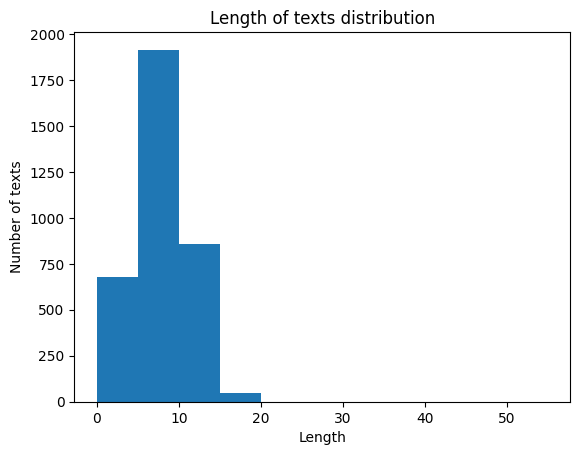

In [51]:
# visualization
total_num_words = [len(one_title) for one_title in X_train_tokenized]
plt.hist(total_num_words, bins = np.arange(0,60,5))
plt.xlabel("Length")
plt.ylabel("Number of texts")
plt.title("Length of texts distribution")
plt.show()

In [52]:
# max length of each text (in terms of number of words)
MAX_LEN = max(total_num_words)
X_train_padded = pad_sequences(X_train_tokenized, maxlen=MAX_LEN)
X_val_padded = pad_sequences(X_val_tokenized, maxlen=MAX_LEN)

In [53]:
model = Sequential()
model.add(Embedding(NUM_WORDS, EMBEDDING_SIZE, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(120, return_sequences=True, name='lstm_layer')))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [54]:
BATCH_SIZE = 32
EPOCHS = 4

model.fit(X_train_padded, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val_padded, y_val))

Epoch 1/4
110/110 [==============================] - 8s 42ms/step - loss: 0.4555 - auc: 0.8614 - val_loss: 0.1716 - val_auc: 0.9866
Epoch 2/4
110/110 [==============================] - 4s 35ms/step - loss: 0.1101 - auc: 0.9899 - val_loss: 0.1707 - val_auc: 0.9857
Epoch 3/4
110/110 [==============================] - 4s 34ms/step - loss: 0.0345 - auc: 0.9988 - val_loss: 0.1514 - val_auc: 0.9882
Epoch 4/4
110/110 [==============================] - 4s 34ms/step - loss: 0.0254 - auc: 0.9984 - val_loss: 0.1910 - val_auc: 0.9824
